<a id="1"></a>
# <div style= "font-family: Cambria; font-weight:bold; letter-spacing: 0px; color:black; font-size:120%; text-align:left;padding:3.0px; background: #cceeff; border-bottom: 8px solid #004466" >IMPORTING ESSENTIAL LIBRARIES<br> <div>

In [365]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pickle
import folium
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import accuracy_score

In [366]:
from sklearn.neighbors import KNeighborsClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

### **To ignore warnings**

In [367]:
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)

### Setting default figure size

In [368]:
sns.set(rc={'figure.figsize':(12, 6)})

<a id="1"></a>
# <div style= "font-family: Cambria; font-weight:bold; letter-spacing: 0px; color:black; font-size:120%; text-align:left;padding:3.0px; background: #cceeff; border-bottom: 8px solid #004466" >READING DATASET AND EXPLORING<br> <div>

In [369]:
df = pd.read_csv('/kaggle/input/startup-success-prediction/startup data.csv')

In [370]:
df['status'].value_counts()

status
acquired    597
closed      326
Name: count, dtype: int64

In [371]:
df.head()

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,labels,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,state_code.1,is_CA,is_NY,is_MA,is_TX,is_otherstate,category_code,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,NaN,Bandsintown,1,1/1/2007,NaN,4/1/2009,1/1/2010,2.2493,3.0027,4.6685,6.7041,3,3,375000,3,CA,1,0,0,0,0,music,0,0,0,0,0,0,0,0,0,1,c:6669,0,1,0,0,0,0,1.0000,0,acquired
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,NaN,TriCipher,1,1/1/2000,NaN,2/14/2005,12/28/2009,5.1260,9.9973,7.0055,7.0055,9,4,40100000,1,CA,1,0,0,0,0,enterprise,0,0,0,1,0,0,0,0,0,0,c:16283,1,0,0,1,1,1,4.7500,1,acquired
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,1,3/18/2009,NaN,3/30/2010,3/30/2010,1.0329,1.0329,1.4575,2.2055,5,1,2600000,2,CA,1,0,0,0,0,web,0,1,0,0,0,0,0,0,0,0,c:65620,0,0,1,0,0,0,4.0000,1,acquired
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,1,1/1/2002,NaN,2/17/2005,4/25/2007,3.1315,5.3151,6.0027,6.0027,5,3,40000000,1,CA,1,0,0,0,0,software,1,0,0,0,0,0,0,0,0,0,c:42668,0,0,0,1,1,1,3.3333,1,acquired
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,0,8/1/2010,10/1/2012,8/1/2010,4/1/2012,0.0000,1.6685,0.0384,0.0384,2,2,1300000,1,CA,1,0,0,0,0,games_video,0,0,0,0,0,1,0,0,0,0,c:65806,1,1,0,0,0,0,1.0000,1,closed


In [372]:
len(df.columns)

49

In [373]:
df.columns

Index(['Unnamed: 0', 'state_code', 'latitude', 'longitude', 'zip_code', 'id',
       'city', 'Unnamed: 6', 'name', 'labels', 'founded_at', 'closed_at',
       'first_funding_at', 'last_funding_at', 'age_first_funding_year',
       'age_last_funding_year', 'age_first_milestone_year',
       'age_last_milestone_year', 'relationships', 'funding_rounds',
       'funding_total_usd', 'milestones', 'state_code.1', 'is_CA', 'is_NY',
       'is_MA', 'is_TX', 'is_otherstate', 'category_code', 'is_software',
       'is_web', 'is_mobile', 'is_enterprise', 'is_advertising',
       'is_gamesvideo', 'is_ecommerce', 'is_biotech', 'is_consulting',
       'is_othercategory', 'object_id', 'has_VC', 'has_angel', 'has_roundA',
       'has_roundB', 'has_roundC', 'has_roundD', 'avg_participants',
       'is_top500', 'status'],
      dtype='object')

In [374]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923 entries, 0 to 922
Data columns (total 49 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                923 non-null    int64  
 1   state_code                923 non-null    object 
 2   latitude                  923 non-null    float64
 3   longitude                 923 non-null    float64
 4   zip_code                  923 non-null    object 
 5   id                        923 non-null    object 
 6   city                      923 non-null    object 
 7   Unnamed: 6                430 non-null    object 
 8   name                      923 non-null    object 
 9   labels                    923 non-null    int64  
 10  founded_at                923 non-null    object 
 11  closed_at                 335 non-null    object 
 12  first_funding_at          923 non-null    object 
 13  last_funding_at           923 non-null    object 
 14  age_first_

<a id="1"></a>
# <div style= "font-family: Cambria; font-weight:bold; letter-spacing: 0px; color:black; font-size:120%; text-align:left;padding:3.0px; background: #cceeff; border-bottom: 8px solid #004466" >FEATURE ENGINEERING<br> <div>

### Method to split date into year, day and month

In [375]:
def year(x):
    return int(x.split('/')[2])
def day(x):
    return int(x.split('/')[1])
def month(x):
    return int(x.split('/')[0])

In [376]:
df['founded_at_year'] = df['founded_at'].apply(year)
df['founded_at_day'] = df['founded_at'].apply(day)
df['founded_at_month'] = df['founded_at'].apply(month)

In [377]:
df['founded_at_year']

0      2007
1      2000
2      2009
3      2002
4      2010
       ... 
918    2009
919    1998
920    1999
921    2009
922    2003
Name: founded_at_year, Length: 923, dtype: int64

In [378]:
df['first_funding_at_year'] = df['first_funding_at'].apply(year)
df['first_funding_at_day'] = df['first_funding_at'].apply(day)
df['first_funding_at_month'] = df['first_funding_at'].apply(month)

In [379]:
df['last_funding_at_year'] = df['last_funding_at'].apply(year)
df['last_funding_at_day'] = df['last_funding_at'].apply(day)
df['last_funding_at_month'] = df['last_funding_at'].apply(month)

In [380]:
df.columns

Index(['Unnamed: 0', 'state_code', 'latitude', 'longitude', 'zip_code', 'id',
       'city', 'Unnamed: 6', 'name', 'labels', 'founded_at', 'closed_at',
       'first_funding_at', 'last_funding_at', 'age_first_funding_year',
       'age_last_funding_year', 'age_first_milestone_year',
       'age_last_milestone_year', 'relationships', 'funding_rounds',
       'funding_total_usd', 'milestones', 'state_code.1', 'is_CA', 'is_NY',
       'is_MA', 'is_TX', 'is_otherstate', 'category_code', 'is_software',
       'is_web', 'is_mobile', 'is_enterprise', 'is_advertising',
       'is_gamesvideo', 'is_ecommerce', 'is_biotech', 'is_consulting',
       'is_othercategory', 'object_id', 'has_VC', 'has_angel', 'has_roundA',
       'has_roundB', 'has_roundC', 'has_roundD', 'avg_participants',
       'is_top500', 'status', 'founded_at_year', 'founded_at_day',
       'founded_at_month', 'first_funding_at_year', 'first_funding_at_day',
       'first_funding_at_month', 'last_funding_at_year', 'last_funding_a

In [381]:
df.head()

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,labels,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,state_code.1,is_CA,is_NY,is_MA,is_TX,is_otherstate,category_code,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status,founded_at_year,founded_at_day,founded_at_month,first_funding_at_year,first_funding_at_day,first_funding_at_month,last_funding_at_year,last_funding_at_day,last_funding_at_month
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,NaN,Bandsintown,1,1/1/2007,NaN,4/1/2009,1/1/2010,2.2493,3.0027,4.6685,6.7041,3,3,375000,3,CA,1,0,0,0,0,music,0,0,0,0,0,0,0,0,0,1,c:6669,0,1,0,0,0,0,1.0000,0,acquired,2007,1,1,2009,1,4,2010,1,1
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,NaN,TriCipher,1,1/1/2000,NaN,2/14/2005,12/28/2009,5.1260,9.9973,7.0055,7.0055,9,4,40100000,1,CA,1,0,0,0,0,enterprise,0,0,0,1,0,0,0,0,0,0,c:16283,1,0,0,1,1,1,4.7500,1,acquired,2000,1,1,2005,14,2,2009,28,12
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,1,3/18/2009,NaN,3/30/2010,3/30/2010,1.0329,1.0329,1.4575,2.2055,5,1,2600000,2,CA,1,0,0,0,0,web,0,1,0,0,0,0,0,0,0,0,c:65620,0,0,1,0,0,0,4.0000,1,acquired,2009,18,3,2010,30,3,2010,30,3
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,1,1/1/2002,NaN,2/17/2005,4/25/2007,3.1315,5.3151,6.0027,6.0027,5,3,40000000,1,CA,1,0,0,0,0,software,1,0,0,0,0,0,0,0,0,0,c:42668,0,0,0,1,1,1,3.3333,1,acquired,2002,1,1,2005,17,2,2007,25,4
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,0,8/1/2010,10/1/2012,8/1/2010,4/1/2012,0.0000,1.6685,0.0384,0.0384,2,2,1300000,1,CA,1,0,0,0,0,games_video,0,0,0,0,0,1,0,0,0,0,c:65806,1,1,0,0,0,0,1.0000,1,closed,2010,1,8,2010,1,8,2012,1,4


<a id="1"></a>
# <div style= "font-family: Cambria; font-weight:bold; letter-spacing: 0px; color:black; font-size:120%; text-align:left;padding:3.0px; background: #cceeff; border-bottom: 8px solid #004466" >DATA VISUALIZATION<br> <div>

In [326]:
df['state_code'].value_counts()

state_code
CA    488
NY    106
MA     83
TX     42
WA     42
CO     19
IL     18
PA     17
VA     13
GA     11
NC      7
OR      7
NJ      7
MD      7
FL      6
OH      6
MN      5
DC      4
CT      4
TN      3
RI      3
UT      3
MI      3
MO      2
NH      2
KY      2
ME      2
NV      2
IN      2
AZ      2
WV      1
NM      1
ID      1
AR      1
WI      1
Name: count, dtype: int64

### Pie chart of the top 10 most commot states

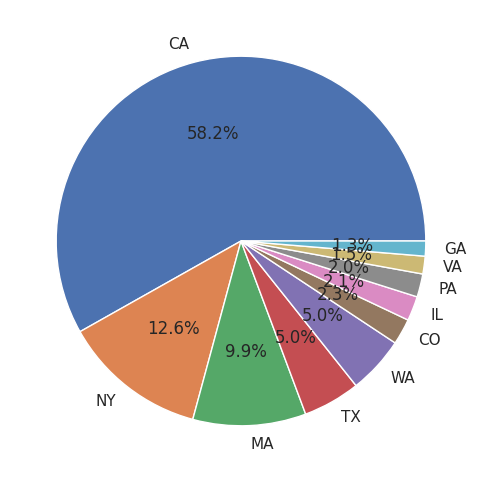

In [327]:
state_count = df['state_code'].value_counts()
plt.pie(state_count.iloc[0:10], labels = state_count.iloc[0:10].index, autopct = '%1.1f%%', )
plt.show()

In [328]:
df['category_code'].value_counts()

category_code
software            153
web                 144
mobile               79
enterprise           73
advertising          62
games_video          52
semiconductor        35
network_hosting      34
biotech              34
hardware             27
ecommerce            25
public_relations     25
cleantech            23
security             19
analytics            19
social               14
search               12
other                11
messaging            11
fashion               8
travel                8
news                  8
medical               7
photo_video           7
music                 6
finance               6
education             4
consulting            3
real_estate           3
health                3
automotive            2
manufacturing         2
transportation        2
hospitality           1
sports                1
Name: count, dtype: int64

### Pie Chart of top 10 most common cathegory

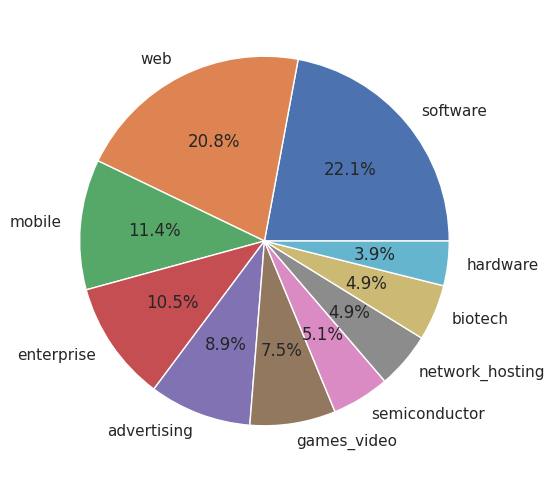

In [329]:
category = df['category_code'].value_counts()
plt.pie(category.iloc[0:10], labels = category.iloc[0:10].index, autopct = '%1.1f%%')
plt.show()

### Pie Chart of 10 to 19th most common cathegory

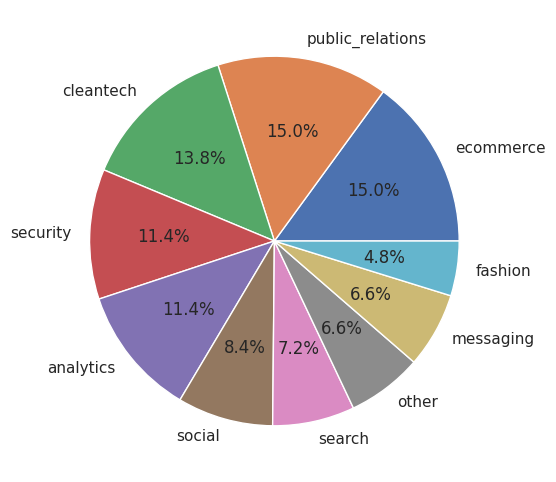

In [330]:
plt.pie(category.iloc[10:20], labels = category.iloc[10:20].index, autopct = '%1.1f%%')
plt.show()

In [331]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923 entries, 0 to 922
Data columns (total 58 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                923 non-null    int64  
 1   state_code                923 non-null    object 
 2   latitude                  923 non-null    float64
 3   longitude                 923 non-null    float64
 4   zip_code                  923 non-null    object 
 5   id                        923 non-null    object 
 6   city                      923 non-null    object 
 7   Unnamed: 6                430 non-null    object 
 8   name                      923 non-null    object 
 9   labels                    923 non-null    int64  
 10  founded_at                923 non-null    object 
 11  closed_at                 335 non-null    object 
 12  first_funding_at          923 non-null    object 
 13  last_funding_at           923 non-null    object 
 14  age_first_

### Count of the status class. number of acquired versus closed

<Axes: xlabel='status', ylabel='count'>

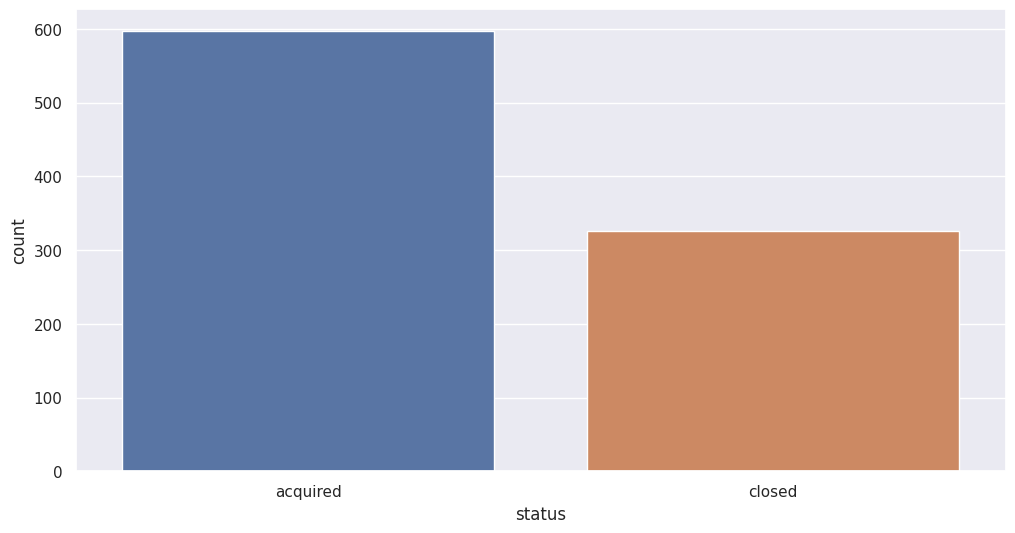

In [332]:
sns.countplot(df, x='status')

In [333]:
df['city'].nunique()

221

### kde plot showing distribution of longitude and latitud. where longitud is the blue line and latitud is the red line

<Axes: xlabel='longitude', ylabel='Density'>

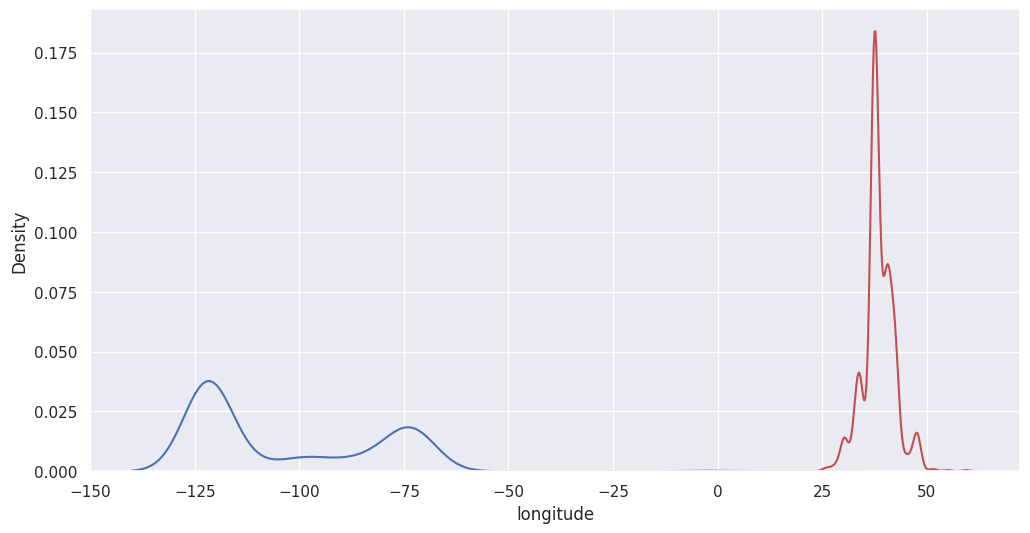

In [334]:
sns.kdeplot(df, x = 'longitude', color = 'b')
sns.kdeplot(df, x = 'latitude', color = 'r')

In [335]:
df['longitude'].value_counts()

longitude
-122.419236    46
-73.986614     27
-100.445882    16
-73.997259      9
-71.105616      8
               ..
-71.453968      1
-77.410927      1
-122.012475     1
-117.201076     1
-122.288378     1
Name: count, Length: 651, dtype: int64

### kde plot showing distribution of number of relationships of the relationships column

<Axes: xlabel='relationships', ylabel='Density'>

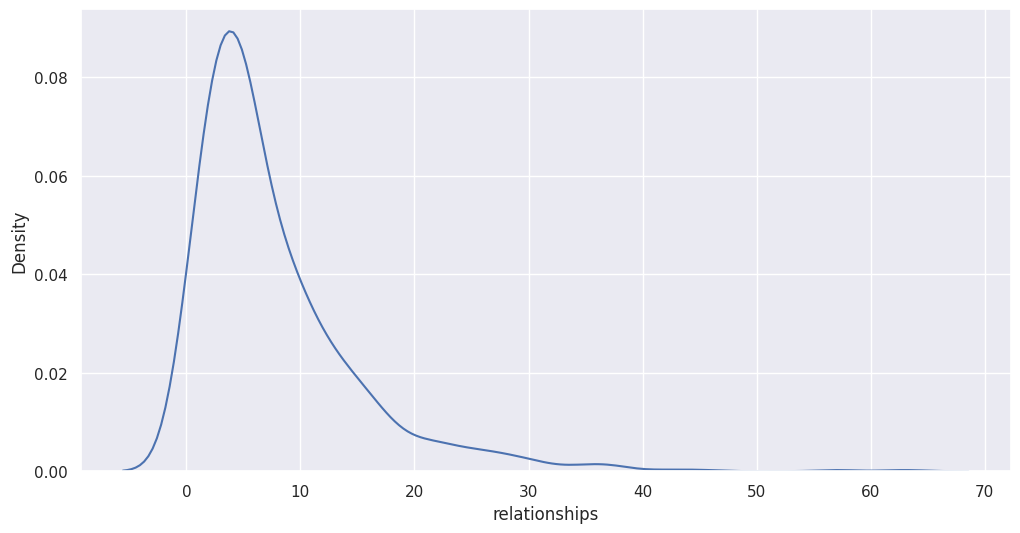

In [336]:
sns.kdeplot(df, x ='relationships', color = 'b')

### kde plot showing the distribution of funding rounds and milestones. where funding_rounds is plotted with red color line and milestone in green color

<Axes: xlabel='funding_rounds', ylabel='Density'>

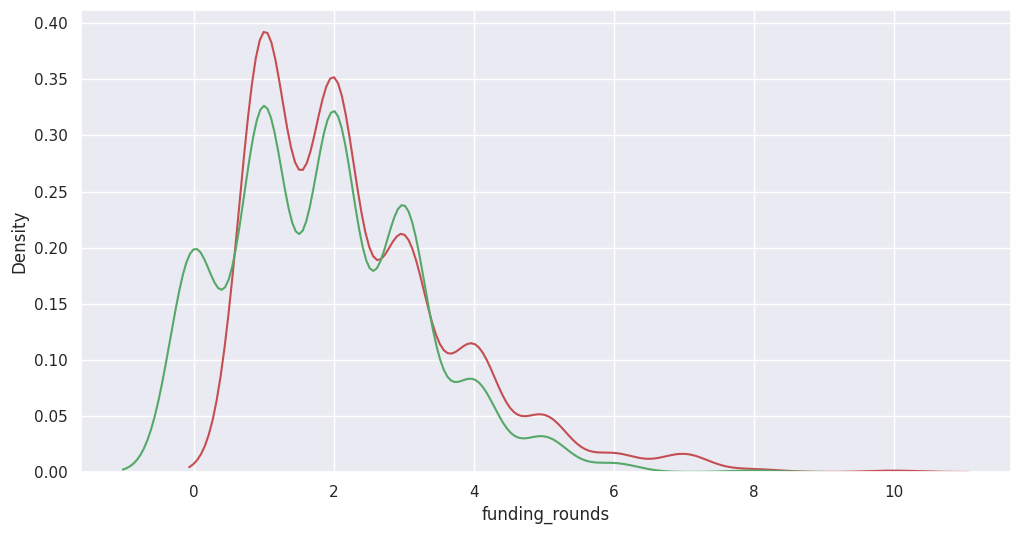

In [337]:
sns.kdeplot(df, x = 'funding_rounds', color = 'r')
sns.kdeplot(df, x = 'milestones', color = 'g')

In [338]:
df.head()

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,labels,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,state_code.1,is_CA,is_NY,is_MA,is_TX,is_otherstate,category_code,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status,founded_at_year,founded_at_day,founded_at_month,first_funding_at_year,first_funding_at_day,first_funding_at_month,last_funding_at_year,last_funding_at_day,last_funding_at_month
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,NaN,Bandsintown,1,1/1/2007,NaN,4/1/2009,1/1/2010,2.2493,3.0027,4.6685,6.7041,3,3,375000,3,CA,1,0,0,0,0,music,0,0,0,0,0,0,0,0,0,1,c:6669,0,1,0,0,0,0,1.0000,0,acquired,2007,1,1,2009,1,4,2010,1,1
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,NaN,TriCipher,1,1/1/2000,NaN,2/14/2005,12/28/2009,5.1260,9.9973,7.0055,7.0055,9,4,40100000,1,CA,1,0,0,0,0,enterprise,0,0,0,1,0,0,0,0,0,0,c:16283,1,0,0,1,1,1,4.7500,1,acquired,2000,1,1,2005,14,2,2009,28,12
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,1,3/18/2009,NaN,3/30/2010,3/30/2010,1.0329,1.0329,1.4575,2.2055,5,1,2600000,2,CA,1,0,0,0,0,web,0,1,0,0,0,0,0,0,0,0,c:65620,0,0,1,0,0,0,4.0000,1,acquired,2009,18,3,2010,30,3,2010,30,3
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,1,1/1/2002,NaN,2/17/2005,4/25/2007,3.1315,5.3151,6.0027,6.0027,5,3,40000000,1,CA,1,0,0,0,0,software,1,0,0,0,0,0,0,0,0,0,c:42668,0,0,0,1,1,1,3.3333,1,acquired,2002,1,1,2005,17,2,2007,25,4
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,0,8/1/2010,10/1/2012,8/1/2010,4/1/2012,0.0000,1.6685,0.0384,0.0384,2,2,1300000,1,CA,1,0,0,0,0,games_video,0,0,0,0,0,1,0,0,0,0,c:65806,1,1,0,0,0,0,1.0000,1,closed,2010,1,8,2010,1,8,2012,1,4


### Countplot showing the number startus founded in each year

<Axes: xlabel='founded_at_year', ylabel='count'>

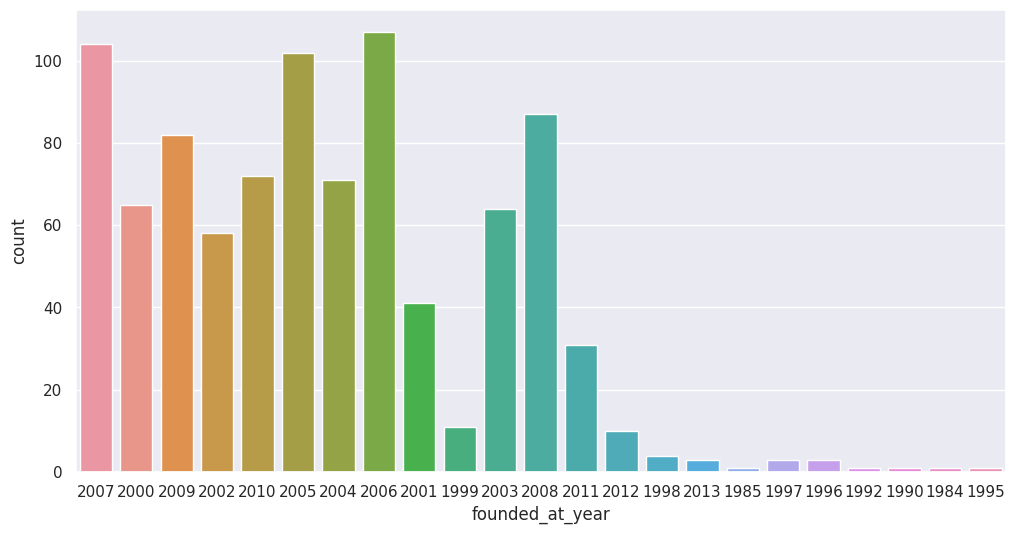

In [339]:
sns.countplot(df, x = 'founded_at_year')

### Countplot showing the number startus founded in each year

<Axes: xlabel='founded_at_month', ylabel='count'>

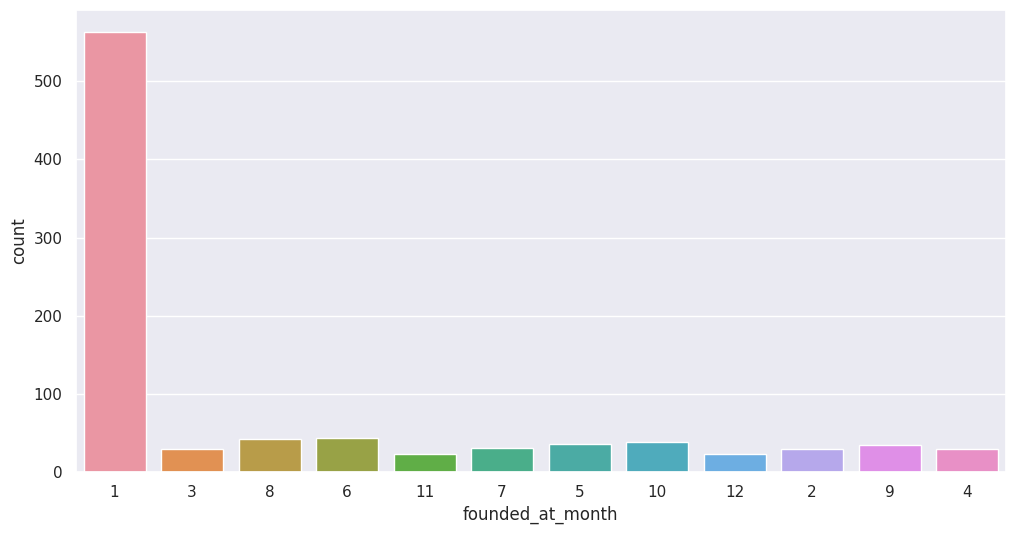

In [340]:
sns.countplot(df, x = 'founded_at_month')

### Countplot showing the number startus founded in each day of the month. it can be seen that most startup started on the first day of the monnth

<Axes: xlabel='founded_at_day', ylabel='count'>

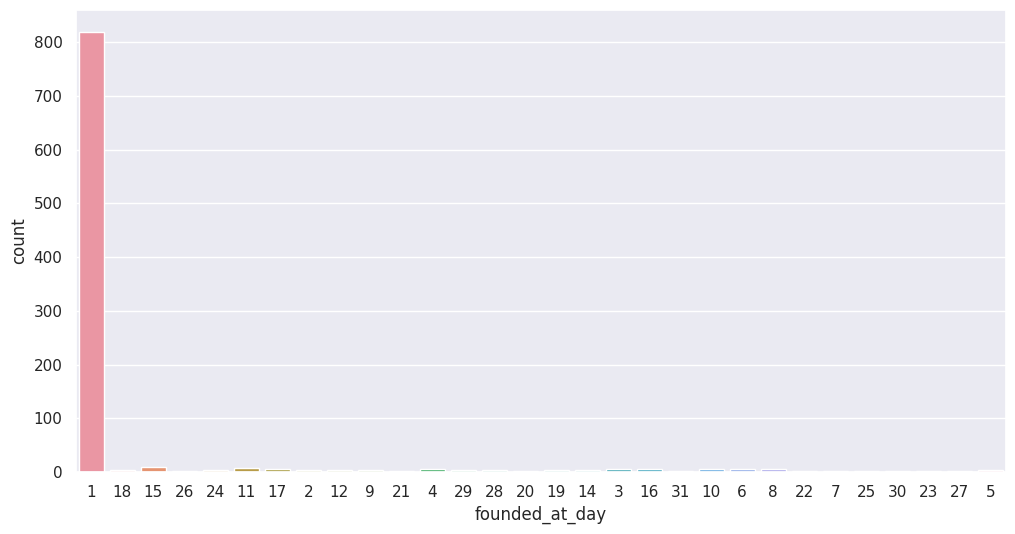

In [341]:
sns.countplot(df, x = 'founded_at_day')

### Plot showing the distribution of the age of startup at first funding (blue), age of startup at last funding (read), age of startup at first milestone (green), age of startup at last milestone (yellow)

<Axes: xlabel='age_first_funding_year', ylabel='Density'>

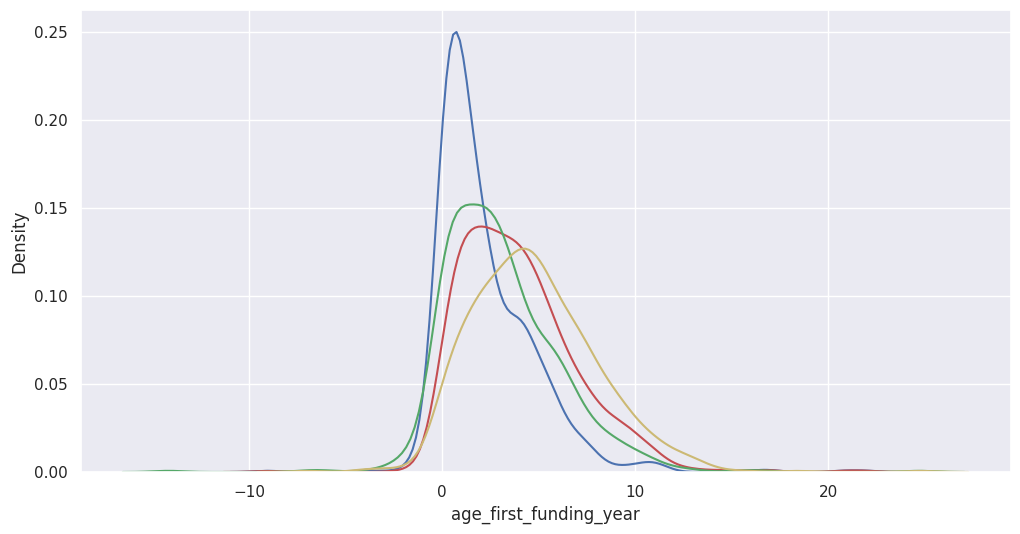

In [342]:
sns.kdeplot(df, x = 'age_first_funding_year', color = 'b' )
sns.kdeplot(df, x = 'age_last_funding_year', color = 'r')
sns.kdeplot(df, x = 'age_first_milestone_year', color = 'g')
sns.kdeplot(df, x = 'age_last_milestone_year', color = 'y')

### ploting the location of the startups on map using the coordinates

In [343]:
latitude_initial = 39.8283
longitude_initial = -50.0000

map = folium.Map(location = [latitude_initial, longitude_initial], 
                  zoom_start = 3, tiles = 'cartodbpositron')


for index, row in df.iterrows():
    folium.Marker([row['latitude'], row['longitude']], popup = row['state_code']).add_to(map)
    
map

<a id="1"></a>
# <div style= "font-family: Cambria; font-weight:bold; letter-spacing: 0px; color:black; font-size:120%; text-align:left;padding:3.0px; background: #cceeff; border-bottom: 8px solid #004466" >DATA PREPROCESSING<br> <div>

In [382]:
len(df.columns)

58

In [383]:
df.columns

Index(['Unnamed: 0', 'state_code', 'latitude', 'longitude', 'zip_code', 'id',
       'city', 'Unnamed: 6', 'name', 'labels', 'founded_at', 'closed_at',
       'first_funding_at', 'last_funding_at', 'age_first_funding_year',
       'age_last_funding_year', 'age_first_milestone_year',
       'age_last_milestone_year', 'relationships', 'funding_rounds',
       'funding_total_usd', 'milestones', 'state_code.1', 'is_CA', 'is_NY',
       'is_MA', 'is_TX', 'is_otherstate', 'category_code', 'is_software',
       'is_web', 'is_mobile', 'is_enterprise', 'is_advertising',
       'is_gamesvideo', 'is_ecommerce', 'is_biotech', 'is_consulting',
       'is_othercategory', 'object_id', 'has_VC', 'has_angel', 'has_roundA',
       'has_roundB', 'has_roundC', 'has_roundD', 'avg_participants',
       'is_top500', 'status', 'founded_at_year', 'founded_at_day',
       'founded_at_month', 'first_funding_at_year', 'first_funding_at_day',
       'first_funding_at_month', 'last_funding_at_year', 'last_funding_a

### Droping column with unuseful data

In [384]:
df.drop(['Unnamed: 0', 'id','Unnamed: 6', 'name', 'labels', 'closed_at',
         'state_code.1', 'is_CA', 'is_NY', 'is_MA', 'is_TX', 
         'is_otherstate', 'is_software',
       'is_web', 'is_mobile', 'is_enterprise', 'is_advertising',
       'is_gamesvideo', 'is_ecommerce', 'is_biotech', 'is_consulting',
       'is_othercategory', 'object_id', 'founded_at', 'first_funding_at', 'last_funding_at'], inplace = True, axis = 1)

In [385]:
print(df.columns)
print(len(df.columns))

Index(['state_code', 'latitude', 'longitude', 'zip_code', 'city',
       'age_first_funding_year', 'age_last_funding_year',
       'age_first_milestone_year', 'age_last_milestone_year', 'relationships',
       'funding_rounds', 'funding_total_usd', 'milestones', 'category_code',
       'has_VC', 'has_angel', 'has_roundA', 'has_roundB', 'has_roundC',
       'has_roundD', 'avg_participants', 'is_top500', 'status',
       'founded_at_year', 'founded_at_day', 'founded_at_month',
       'first_funding_at_year', 'first_funding_at_day',
       'first_funding_at_month', 'last_funding_at_year', 'last_funding_at_day',
       'last_funding_at_month'],
      dtype='object')
32


### Heatmap to display the missing values in the dataset us isna() method

<Axes: >

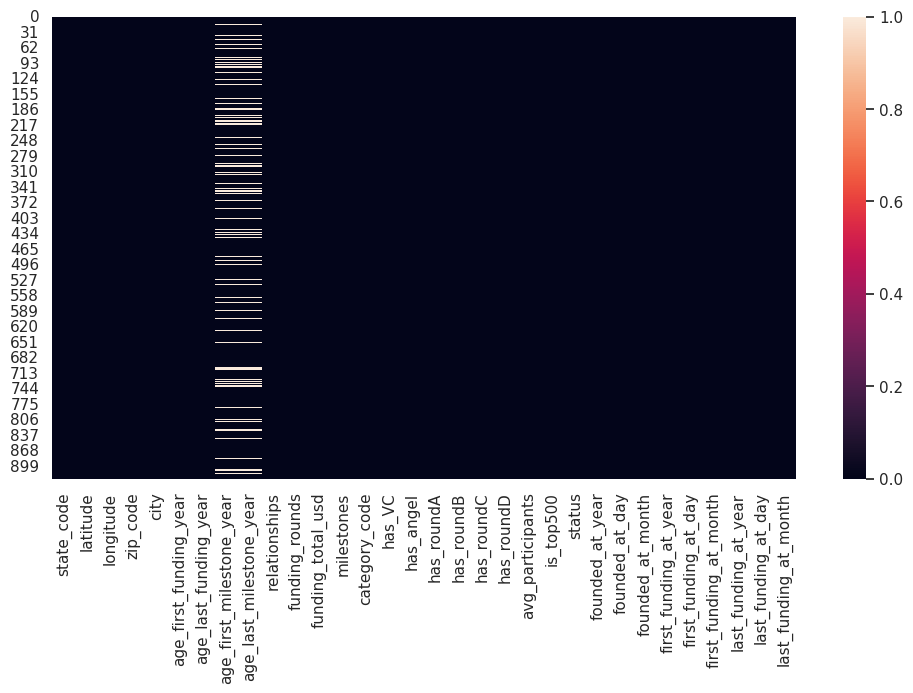

In [348]:
sns.heatmap(df[df.columns].isna() )


### Replacing missing values in the age_first_milestone_year and age_last_milestone_year with the mean value of the column

In [386]:
df['age_first_milestone_year'].fillna(df['age_first_milestone_year'].mean(), inplace = True)
df['age_last_milestone_year'].fillna(df['age_last_milestone_year'].mean(), inplace = True)

<Axes: >

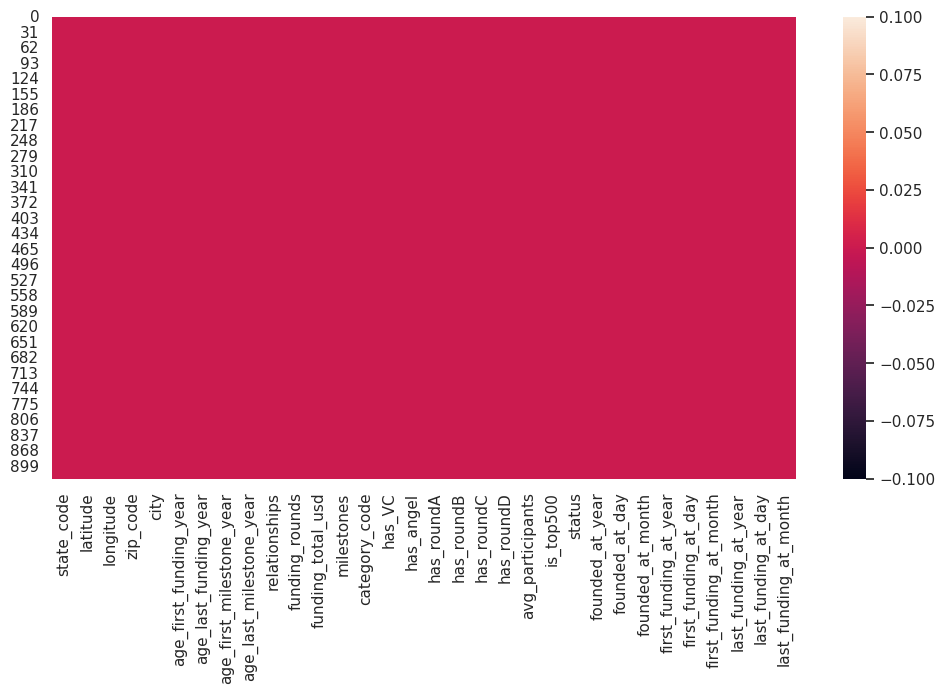

In [350]:
sns.heatmap(df[df.columns].isna() )

In [387]:
df.head(10)

,state_code,latitude,longitude,zip_code,city,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,category_code,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status,founded_at_year,founded_at_day,founded_at_month,first_funding_at_year,first_funding_at_day,first_funding_at_month,last_funding_at_year,last_funding_at_day,last_funding_at_month
0,CA,42.358880,-71.056820,92101,San Diego,2.2493,3.0027,4.6685,6.7041,3,3,375000,3,music,0,1,0,0,0,0,1.0000,0,acquired,2007,1,1,2009,1,4,2010,1,1
1,CA,37.238916,-121.973718,95032,Los Gatos,5.1260,9.9973,7.0055,7.0055,9,4,40100000,1,enterprise,1,0,0,1,1,1,4.7500,1,acquired,2000,1,1,2005,14,2,2009,28,12
2,CA,32.901049,-117.192656,92121,San Diego,1.0329,1.0329,1.4575,2.2055,5,1,2600000,2,web,0,0,1,0,0,0,4.0000,1,acquired,2009,18,3,2010,30,3,2010,30,3
3,CA,37.320309,-122.050040,95014,Cupertino,3.1315,5.3151,6.0027,6.0027,5,3,40000000,1,software,0,0,0,1,1,1,3.3333,1,acquired,2002,1,1,2005,17,2,2007,25,4
4,CA,37.779281,-122.419236,94105,San Francisco,0.0000,1.6685,0.0384,0.0384,2,2,1300000,1,games_video,1,1,0,0,0,0,1.0000,1,closed,2010,1,8,2010,1,8,2012,1,4
5,CA,37.406914,-122.090370,94043,Mountain View,4.5452,4.5452,5.0027,5.0027,3,1,7500000,1,network_hosting,0,0,0,1,0,0,3.0000,1,closed,2002,1,1,2006,18,7,2006,18,7
6,CA,37.391559,-122.070264,94041,Mountain View,1.7205,5.2110,3.0000,6.6082,6,3,26000000,2,software,1,0,1,1,0,0,1.6667,1,acquired,2005,1,1,2006,21,9,2010,18,3
7,CA,38.057107,-122.513742,94901,San Rafael,1.6466,6.7616,5.6055,7.3616,25,3,34100000,3,finance,0,0,1,1,0,1,3.5000,1,acquired,2004,1,1,2005,24,8,2010,4,10
8,MA,42.712207,-73.203599,1267,Williamstown,3.5863,11.1123,8.0055,9.9945,13,3,9650000,4,mobile,1,0,1,0,0,1,4.0000,1,acquired,2002,1,1,2005,2,8,2013,8,2
9,CA,37.427235,-122.145783,94306,Palo Alto,1.6712,4.6849,2.9178,6.1151,14,3,5750000,4,web,1,1,1,0,0,0,1.0000,1,acquired,2005,1,6,2007,1,2,2010,5,2


### Fetch categorical columns from the list of columns

In [388]:
cat_columns = df.select_dtypes(include=['object'])

In [389]:
cat_columns.head()

,state_code,zip_code,city,category_code,status
0,CA,92101,San Diego,music,acquired
1,CA,95032,Los Gatos,enterprise,acquired
2,CA,92121,San Diego,web,acquired
3,CA,95014,Cupertino,software,acquired
4,CA,94105,San Francisco,games_video,closed


### initialize label encoder and encode all the categorical columns

In [390]:
le = LabelEncoder()

In [391]:
for column in cat_columns.columns:
    df[column] = le.fit_transform(df[column])

In [392]:
df.head()

,state_code,latitude,longitude,zip_code,city,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,category_code,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status,founded_at_year,founded_at_day,founded_at_month,first_funding_at_year,first_funding_at_day,first_funding_at_month,last_funding_at_year,last_funding_at_day,last_funding_at_month
0,2,42.358880,-71.056820,250,173,2.2493,3.0027,4.6685,6.7041,3,3,375000,3,19,0,1,0,0,0,0,1.0000,0,0,2007,1,1,2009,1,4,2010,1,1
1,2,37.238916,-121.973718,336,108,5.1260,9.9973,7.0055,7.0055,9,4,40100000,1,8,1,0,0,1,1,1,4.7500,1,0,2000,1,1,2005,14,2,2009,28,12
2,2,32.901049,-117.192656,251,173,1.0329,1.0329,1.4575,2.2055,5,1,2600000,2,34,0,0,1,0,0,0,4.0000,1,0,2009,18,3,2010,30,3,2010,30,3
3,2,37.320309,-122.050040,333,55,3.1315,5.3151,6.0027,6.0027,5,3,40000000,1,30,0,0,0,1,1,1,3.3333,1,0,2002,1,1,2005,17,2,2007,25,4
4,2,37.779281,-122.419236,295,174,0.0000,1.6685,0.0384,0.0384,2,2,1300000,1,11,1,1,0,0,0,0,1.0000,1,1,2010,1,8,2010,1,8,2012,1,4


### creat dependent and independent features set

In [393]:
x = df.drop('status', axis = 1)
y = df['status']

<a id="1"></a>
# <div style= "font-family: Cambria; font-weight:bold; letter-spacing: 0px; color:black; font-size:120%; text-align:left;padding:3.0px; background: #cceeff; border-bottom: 8px solid #004466" > FEATURES SELECTION<br> <div>

### Use random forest to check for import featues and select the important features

In [394]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(x, y)


importances = rf.feature_importances_


print("Feature Importances:")
for i, importance in enumerate(importances):
    print(f"Feature {i}: {importance:.4f}")


Feature Importances:
Feature 0: 0.0127
Feature 1: 0.0361
Feature 2: 0.0324
Feature 3: 0.0342
Feature 4: 0.0284
Feature 5: 0.0564
Feature 6: 0.0526
Feature 7: 0.0486
Feature 8: 0.0704
Feature 9: 0.1366
Feature 10: 0.0244
Feature 11: 0.0722
Feature 12: 0.0510
Feature 13: 0.0269
Feature 14: 0.0060
Feature 15: 0.0036
Feature 16: 0.0074
Feature 17: 0.0075
Feature 18: 0.0058
Feature 19: 0.0034
Feature 20: 0.0418
Feature 21: 0.0278
Feature 22: 0.0421
Feature 23: 0.0059
Feature 24: 0.0125
Feature 25: 0.0213
Feature 26: 0.0280
Feature 27: 0.0272
Feature 28: 0.0236
Feature 29: 0.0279
Feature 30: 0.0253


In [395]:
x.drop(x.columns[14:20], inplace = True, axis = 1)


In [396]:
df.head()

,state_code,latitude,longitude,zip_code,city,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,category_code,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status,founded_at_year,founded_at_day,founded_at_month,first_funding_at_year,first_funding_at_day,first_funding_at_month,last_funding_at_year,last_funding_at_day,last_funding_at_month
0,2,42.358880,-71.056820,250,173,2.2493,3.0027,4.6685,6.7041,3,3,375000,3,19,0,1,0,0,0,0,1.0000,0,0,2007,1,1,2009,1,4,2010,1,1
1,2,37.238916,-121.973718,336,108,5.1260,9.9973,7.0055,7.0055,9,4,40100000,1,8,1,0,0,1,1,1,4.7500,1,0,2000,1,1,2005,14,2,2009,28,12
2,2,32.901049,-117.192656,251,173,1.0329,1.0329,1.4575,2.2055,5,1,2600000,2,34,0,0,1,0,0,0,4.0000,1,0,2009,18,3,2010,30,3,2010,30,3
3,2,37.320309,-122.050040,333,55,3.1315,5.3151,6.0027,6.0027,5,3,40000000,1,30,0,0,0,1,1,1,3.3333,1,0,2002,1,1,2005,17,2,2007,25,4
4,2,37.779281,-122.419236,295,174,0.0000,1.6685,0.0384,0.0384,2,2,1300000,1,11,1,1,0,0,0,0,1.0000,1,1,2010,1,8,2010,1,8,2012,1,4


<a id="1"></a>
# <div style= "font-family: Cambria; font-weight:bold; letter-spacing: 0px; color:black; font-size:120%; text-align:left;padding:3.0px; background: #cceeff; border-bottom: 8px solid #004466" > CHOOSING MODEL<br> <div>

### bagging is applied here to get the best model that can capture well the dataset different model was cross validated on the dataset to check their performance and the best 3 where selected

In [397]:
estimators = [
RandomForestClassifier(),
AdaBoostClassifier(),
GradientBoostingClassifier(),
KNeighborsClassifier(),
DecisionTreeClassifier(),
SVC(),
ExtraTreesClassifier(),  
SGDClassifier(), 
XGBClassifier(), 
MLPClassifier(),
GaussianNB(),
LinearDiscriminantAnalysis(),
QuadraticDiscriminantAnalysis(),
LGBMClassifier()
]

In [398]:
estimators_list = [
'RandomForestClassifier',
'AdaBoostClassifier',
'GradientBoostingClassifier',
'KNeighborsClassifier',
'DecisionTreeClassifier',
'SVC',
'BaggingClassifier',
'ExtraTreesClassifier',  
'SGDClassifier', 
'XGBClassifier',
'MLPClassifier',
'GaussianNB',
'LinearDiscriminantAnalysis',
'QuadraticDiscriminantAnalysis',
'LGBMClassifier'
]

In [399]:
scores = {}


for count in range(len(estimators)):
    estimate = estimators[count]
    scores[estimators_list[count]]=cross_val_score(estimate, X =x, y = y, cv=5, scoring = 'accuracy', ).mean()
    

print(scores)

[LightGBM] [Info] Number of positive: 261, number of negative: 477
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000696 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2321
[LightGBM] [Info] Number of data points in the train set: 738, number of used features: 25
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.353659 -> initscore=-0.602996
[LightGBM] [Info] Start training from score -0.602996
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

In [400]:
scores

{'RandomForestClassifier': 0.8071739130434784,
 'AdaBoostClassifier': 0.7768390129259695,
 'GradientBoostingClassifier': 0.7887132784958872,
 'KNeighborsClassifier': 0.6305875440658049,
 'DecisionTreeClassifier': 0.6868390129259694,
 'SVC': 0.6468037602820212,
 'BaggingClassifier': 0.7832843713278497,
 'ExtraTreesClassifier': 0.5895064629847239,
 'SGDClassifier': 0.7757168037602821,
 'XGBClassifier': 0.5427144535840187,
 'MLPClassifier': 0.4267450058754406,
 'GaussianNB': 0.7258989424206815,
 'LinearDiscriminantAnalysis': 0.6294065804935369,
 'QuadraticDiscriminantAnalysis': 0.7887191539365452}

<a id="1"></a>
# <div style= "font-family: Cambria; font-weight:bold; letter-spacing: 0px; color:black; font-size:120%; text-align:left;padding:3.0px; background: #cceeff; border-bottom: 8px solid #004466" > HYPER-PARAMETER TUNNING<br> <div>

### Searching parameter space for the best hyper paramteter for the three models and the voting classifier of the three of them. xgbclassifier tends to get the best hyper parameter and fit best

In [409]:
params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}
XGB = XGBClassifier()
random = RandomizedSearchCV(estimator = XGB, param_distributions= params, n_iter = 1000, scoring = 'accuracy' )
random.fit(x, y)
random.best_score_

0.8115099882491188

In [403]:
params = {
    "learning_rate": [0.05, 0.1, 0.15, 0.2, 0.25, 0.3],
    "n_estimators": [50, 100, 150, 200, 250], 
    "max_depth": [3, 4, 5, 6, 8, 10, None],  
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "subsample": [0.6, 0.7, 0.8, 0.9, 1.0], 
    "max_features": ["auto", "sqrt", "log2"],
}
Gradientboost = GradientBoostingClassifier()
random1 = RandomizedSearchCV(estimator = Gradientboost, param_distributions=params, n_iter=100, scoring = 'accuracy' )
random1.fit(x, y)
random1.best_score_

0.8028495887191539

In [404]:
params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt'],
    'bootstrap': [True, False]
}
rf = RandomForestClassifier()
random2 = RandomizedSearchCV(estimator = rf, param_distributions=params, n_iter = 30, scoring = 'accuracy' )
random2.fit(x, y)
random2.best_score_

0.8104054054054053

In [ ]:
voting = VotingClassifier([
    ('estimator1', random.best_estimator_),
    ('estimator2', random1.best_estimator_),
    ('estimator3', random2.best_estimator_)]
)
cross_val_score(voting, X=x, y = y, cv = 5, scoring = 'accuracy').mean()

<a id="1"></a>
# <div style= "font-family: Cambria; font-weight:bold; letter-spacing: 0px; color:black; font-size:120%; text-align:left;padding:3.0px; background: #cceeff; border-bottom: 8px solid #004466" > EXPORTING MODELS<br> <div>

### exporting the best model to be applied to the application

In [410]:
with open('model', 'wb') as f:
    pickle.dump(random.best_estimator_, f)